<a href="https://colab.research.google.com/github/David-Giraldo/Analitica_de_datos_/blob/main/Taller_2_anal%C3%ADtica_de_datos_terminado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller 2

**Juan José Chamorro Paz**
**817513**

**David Eduardo Giraldo Hernández**
**818032**

**Andrés Fernando Mejía Alarcón**
**817536**


##Consulta 
1. Consultar modelo, función de costo y estrategia de optimización de los 
siguientes clasificadores:

  * Naive Bayes
  * Linear discriminant analysis
  * SGD classifier
  * Linear SVC
  * SVC con kernel rbf
  * Random Forest
  * K neighbors classifier
  * Logistic Regression (es un clasificador no regresor)


2. A partir de la base de datos trabajada en el cuaderno 
https://github.com/amalvarezme/AnaliticaDatos/blob/master/3_DeteccionClasificacionGH/pruebapeopleclasificacion.ipynb , realizar un análisis comparativo en términos de acierto, classification report, ROC, y AUC de los métodos del punto 1. Utilizar validación cruzada según el cuaderno referido. Discuta los resultados obtenidos y pruebe distintos pipelines que incluyan normalización standard scaler, min max, y sin normalización.




###Punto 1
  

####Naive Bayes


Se basa en la suposición “ingenua” de Bayes la cual asume independencia condicional entre cada par de características dado el valor de la variable de clase.
El teorema de Bayes establece que 

$$P(y | x_1, ..., x_n)=\frac{P(y)P(x_1, ..., x_n|y)}{P(x_1, ..., x_n)} $$

asumiendo "ingenuamente" la independencia condicional: 

$$P(x_i|y,x_1,...,x_{i-1},x_{i+1},...,x_n)=P(x_i|y)$$

para todos $i$, por lo que 

$$P(y | x_1, ..., x_n)=\frac{P(y)\prod_{i=1}^n P(x_i|y)}{P(x_1, ..., x_n)} $$

Con $P(x_1,...,x_n)$ constante dada la entrada, se puede obtener la siguiente regla de clasificación

$$\hat y = arg max_y P(y)\prod_{i=1}^n P(x_i|y)$$

Usando la aproximación máxima (MAP) para encontrar $P(y)$ y $P(x_i|y)$.
Esta clasificación requiere una pequeña cantidad de datos de entrenamiento para estimar los parámetros necesarios, además, suelen ser mucho más rapidos que clasificadores más sofisticados, y cada distribución se puede estimar de forma independiente como una distribución unidimensional debido a el desacoplamiento de las distribuciones de características condicionales de clase, sin embargo, el clasificador "Naive Bayes" se cnsidera como un mal estimador, por lo que sus predicciones no son muy tomadas encuenta.

Uno de los clasificadores de "Naive Bayes" es el Gaussiano el cual implementa una probabilidad Gaussiana para su clasificación.

$$P(x_i|y)=\frac{1}{\sqrt{2\pi \sigma_{y}^2}} exp(-\frac{(x_i-\mu_y)^2}{2\sigma_y^2})$$

Los parametros $\sigma_y$ y $\mu_y$ se estiman utilizando la máxima verosimilitud.

**Código de importación**

from sklearn.naive_bayes import GaussianNB




####Linear discriminant analysis


Es un clasificador que utiliza la regla de Bayes, este ajusta una densidad gaussiana a cada clase asumiendo que todas las clases comparten la misma matriz de covarianza.

Para esta clasificación, se designa un límite de desición lineal que se genera tras el ajuste de las densidades condicionales de cada clase de datos.
 
El clasificador también se puede utilizar para reducir la dimensionalidad de la entrada, proyectándola en las direcciones más discriminatorias, al utilizar el método "Transform".

En su clase:

class sklearn.discriminant_analysis.LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001, covariance_estimator=None)

se pueden determinar los siguientes parámetros y atributos.
 
**Parámetros:**
* **solver: {‘svd’, ‘lsqr’, ‘eigen’}, default=’svd’** 

    Puede utilizar 3 valores
      * 'svd': Descomposición de valores singulares, es el valor predeterminado y como no calcula la matriz de covarianza, se recomienda para datos con gran cantidad de caracterizticas
      * 'lsqr': Solución de mínimos cuadrados. 
      * 'eigen': Descomposición de valores propios.

* **shrinkage: ‘auto’ or float, default=None**

  Parámetro de contracción que puede tomar ciertos valores:
      * None: No usa ninguna contracción, es el valor predeterminado.
      * 'auto': Encogimiento automático usando el lema Ledoit-Wolf.
      * float: Parámetro de contracción fijo, puede ser 0 ó 1.

* **priors: array-like of shape (n_classes,), default=None**

  Muestra las probabilidades previas. su valor predeterminado es '$None$' lo que significa que las proporciones de clase se infieren de los datos de entrenamiento.

* **n_component: sint, default=None**

  Número de componentes para la reducción de dimensionalidad, su valor predeterminado es '$None$' lo que significa que se establecerá con el mínimo, este parámetro solo afecta al método 'Transform'.

* **store_covariance: bool, default=False**

  Cuando el parametro es True se calcula explícitamente la matriz de covarianza ponderada dentro de la clase cuando el solucionador sea 'svd'.

* **tol: float, default=1.0e-4**

  Define el umbral que considera un valor como significativo, solo se usa si el solucionador es 'svd'.

* **covariance_estimator: covariance estimator, default=None**

  Si el parámetro es '$None$', covariance_estimator se utiliza para estimar las matrices de covarianza en lugar de depender del estimador de covarianza empírico.

**Atributos**
* **coef_: ndarray of shape (n_features,) or (n_classes, n_features)**

  Representa el vector de peso.

* **intercept_: ndarray of shape (n_classes,)**

  Representa el término de intersección.

* **covariance_: array-like of shape (n_features, n_features)**

  Corresponde a donde está la matriz de covarianza de las muestras en clase.

* **explained_variance_ratio_: ndarray of shape (n_components,)**

  Representa el porcentaje de varianza explicada por cada uno de los componentes seleccionados.

* **means_: array-like of shape (n_classes, n_features)**

  Representan la media de la clase. 

* **priors_: array-like of shape (n_classes,)**

  Representa el a priori de clase.

* **scalings_: array-like of shape (rank, n_classes - 1)**

  Representa la escala de las entidades en el espacio atravesado por los centroides de clase.

* **xbar_: array-like of shape (n_features,)**

  Representa la media general. Solo está presente si el solucionador es 'svd'.

* **classes_: array-like of shape (n_classes,)**

  Representa las etiquetas de clase únicas.


Para utilizarlo se debe importar como:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Analizar como:

clf = LinearDiscriminantAnalysis()

Entrenar como:

clf.fit()

y predecir como:

clf.predict()

####SGD classifier

Se trata de un clasificador que implementa modelos lineales regularizados con aprendizaje de descenso de gradiente estocástico (SGD), en donde el gadiente de la pérdida se estima en cada muestraa la vez y el modelo se actualiza a lo largo del camino con un programa de fuerza decreciente. 

Para obtener los mejores resultados utilizando el programa de tasa de aprendizaje predeterminado, los datos deben tener una media en cero y una varianza unitaria.

La implementación del clasificador funciona con datos representados como matrices densas o dispersas de valores de punto flotante para las características, y el modelo al que se ajusta se puede controlar con el parámetro de pérdida, este, por defecto, se ajusta a una máquina de vectores de soporte lineal (SVM).


En su clase:

class sklearn.linear_model.SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)

se pueden determinar los siguientes parámetros y atributos.

**Parámetros**:
* **losss: tr, default=’hinge’**

  Representa la función de pérdida que se utilizará. El valor predeterminado es "bisagra", que proporciona una SVM lineal.

  Las opciones posibles son 'hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron' o una pérdida de regresión: 'squared_loss', 'huber', 'epsilon_insensitive' o 'squared_epsilon_insensitive'.

  La pérdida 'logarítmica' da una regresión logística, un clasificador probabilístico. 'modified_huber' es otra pérdida suave que aporta tolerancia a valores atípicos, así como estimaciones de probabilidad. 'squared_hinge' es como bisagra pero está penalizado cuadráticamente. 'perceptrón' es la pérdida lineal utilizada por el algoritmo del perceptrón. Las otras pérdidas están diseñadas para la regresión, pero también pueden ser útiles en la clasificación.

* **penalty:{‘l2’, ‘l1’, ‘elasticnet’}, default=’l2’**

  Representa la penalización que se utilizará. El valor predeterminado es 'l2'.

* **alpha: float, default=0.0001**

  Representa la constante que multiplica el plazo de regularización. Cuanto mayor sea el valor, más fuerte será la regularización.

* **l1_ratio: float, default=0.15**

  Representa al parámetro de mezcla Elastic Net, con 0 <= l1_ratio <= 1. l1_ratio = 0 corresponde a la penalización L2, l1_ratio = 1 a L1. 

* **fit_intercept: bool, default=True**

  Muestra si la intersección debe estimarse o no. Si es falso, se supone que los datos ya están centrados.

* **max_iter: int, default=1000**

  Represena al número máximo de pasadas sobre los datos de entrenamiento.

* **tol: float, default=1e-3**

  Representa el criterio de parada. Si no es '$None$', el entrenamiento se detendrá cuando (loss> best_loss - tol) por n_iter_no_changeépocas consecutivas

* **shuffle: bool, default=True**

  Muesta si los datos de entrenamiento deben barajarse o no después de cada época.

* **verbose: int, default=0**

  Representa el nivel de verbosidad.

* **epsilon: float, default=0.1**

  Epsilon en las funciones de pérdida insensibles a épsilon; solo si losses 'huber', 'epsilon_insensitive' o 'squared_epsilon_insensitive'. Para 'huber', determina el umbral en el que se vuelve menos importante obtener la predicción exactamente correcta. Para los insensibles a épsilon, cualquier diferencia entre la predicción actual y la etiqueta correcta se ignora si es menor que este umbral.

* **n_jobs: int, default=None**

  Representa el número de CPU que se utilizarán para realizar el cálculo OVA (One Versus All, para problemas de varias clases). '$None$' significa 1 a menos que esté en un joblib.parallel_backendcontexto. -1significa utilizar todos los procesadores. 

* **random_state: int, RandomState instance, default=None**

  Se utiliza para mezclar los datos cuando shufflese establece en True.

* **learning_rate: str, default=’optimal’**

  Representa el ritmo de aprendizaje, puede ser:
      * 'constante': eta = eta0
      * 'óptimo': donde t0 es elegido por una heurística propuesta por Leon Bottou.eta = 1.0 / (alpha * (t + t0))
      * 'invscaling': eta = eta0 / pow(t, power_t)
      * 'adaptativo': eta = eta0, siempre que el entrenamiento siga disminuyendo.

* **eta0: double, default=0.0**

  Representa la tasa de aprendizaje inicial para los horarios "constante", "invscaling" o "adaptativo" su valor valor predeterminado es 0.0.

* **power_t: double, default=0.5**

  Representa el exponente de la tasa de aprendizaje de escala inversa, su valor predeterminado es 0,5.

* **early_stopping: bool, default=False**

  Se utiliza si se debe realizar la parada anticipada para finalizar el entrenamiento cuando la puntuación de validación no mejora. Si se establece en Verdadero, automáticamente apartará una fracción estratificada de los datos de entrenamiento como validación y finalizará el entrenamiento cuando la puntuación de validación devuelta por el scoremétodo no mejore en al menos tol para n_iter_no_change épocas consecutivas.

* **validation_fraction: float, default=0.1**

  Representa la proporción de datos de entrenamiento que se deben reservar como conjunto de validación para la detención anticipada. Debe estar entre 0 y 1.

* **n_iter_no_change: int, default=5**

  Representa el número de iteraciones sin mejora que esperar antes de detener el ajuste.

* **class_weight: dict, {class_label: weight} or “balanced”, default=None**

  Representa los pesos asociados a clases. Si no se da, se supone que todas las clases tienen un peso uno.

* **warm_start:bool, default=False**

  Si el parámetro se establece en True, reutiliza la solución de la llamada anterior para que encaje como inicialización; de lo contrario, simplemente borra la solución anterior.

* **average: bool or int, default=False**

  Si el paráetro se establece en Verdadero, se calcula los pesos SGD promediados en todas las actualizaciones y se almacena el resultado en el coef_atributo.


**Atributos**:
* **coef_: ndarray of shape (1, n_features) if n_classes == 2 else (n_classes, n_features)**

  Representa los pesos asignados a las características.

* **intercept_: ndarray of shape (1,) if n_classes == 2 else (n_classes,)**

  Representa las constantes en función de decisión.

* **n_iter_: int**

  Representa el número real de iteraciones antes de alcanzar el criterio de parada.

* **loss_function_: concrete**
* **classes_: array of shape (n_classes,)**
* **t_: int**

  Representa el número de actualizaciones de peso realizadas durante el entrenamiento.


El clasificador se importa mediante:

from sklearn.linear_model import SGDClassifier

se entrena mediante:

funcion.fit(X, Y)

y se predice mediante:

funcion.predict()

####Linear SVC

Se trata de una clasificación lineal de vectores, la cual funciona igual que el SVC kernel cuando el parámetro $kernel=lineal$, sin embargo, a diferencia de este, tiene mayor flexibilidad en la elección de penalizaciones, funciones de pérdida, y escala mejor a un gran número de muestras.

Además, esta clase admite entradas densas y dispersas y el soporte multiclase se maneja de acuerdo con un esquema de uno contra el resto.

En su clase:

class sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)

Se pueden determinar los siguientes parámetros y atributos.

**Parámetros**

  * **penalty: {‘l1’, ‘l2’}, default=’l2’**

  especifica la norma que se utilizará en la penalización. la penalización ‘L2’ es la predeterminada para esta clase. 

  * **loss: {‘hinge’, ‘squared_hinge’}, default=’squared_hinge’**

  Especifica la función de pérdida. ‘hinge’ es la pérdida predeterminado de SVM, mientras que ‘squared_hinge’ es el cuadrado de la perdida 'hinge'. No se admite la combinacion de la penalidad 'L1' y la pérdida 'hinge'.

  * **dual: bool, default=True**

  Selecciona el algoritmo para resolver el problema de optimizacion primario o dual. Se usa preferiblemente $dual=False$ cuando $n_muestras > n_caracteristicas$.

  * **tol: float, default=1e-4**

  Representa la tolerancia a los críticos de parada.

  * **C: float, default=1.0**

  Representa el parámetro de regularización. La fuerza de regularización es inversamente proporcional al parámetro C. Debe ser estrictamente positiva.

  * **multi_class: {‘ovr’, ‘crammer_singer’}, default=’ovr’**

  Determina la estrategia multiclases si contiene mas de 2 clases. El "ovr" entrena n_clases uno contra el resto de clasificadores, mientras que, "crammer_singer" optimiza un objetivo conjunto de todas las clases. si se escoje "crammer_singer", la opción de perdida, penalización y dual se ignoran.

  * **fit_intercept: bool, default=True**

  Calcula la intercepción del modelo. Si se establece como $false$, se espera que los datos esten centrados y no se calculará ningúna intersección.

  * **intercept_scaling: float, default=1**

  Cuando 'self.fit_intercept' esta establecido como $True$, la instancia del vector x se conviete en [x, self.intercept_scaling]. 

  * **class_weight: dict or ‘balanced’, default=None**

  Establece el parámetro C de la clase i en 'class_weight[i]*C' para SVC. si no se da, se supone que todas las clases tienen peso unitario. El modo “balanced”utiliza los valores de y para ajustar automaticamente los pesos de forma inversamente proporcional a las frequencias de la clase en los datos de entrada como n_muestras / (n_clases * np.bincount(y)).

  * **verbose: int, default=0**

  Habilita la salida 'verbose'. Esta configuración arovecha la configuración del tiempo de ejecución de pre-proceso en liblinear, la cual, si se encuentra habilitada, puede que no trabaje adecuadamente en un contexto multiproceso.

  * **random_state: int, RandomState instance or None, default=None**

  Controla la generacion de números 'pseudo aleatorios' para mezclar los datos para el descenso de cordenadas dual (si dual=True). Cuando dual=False la implementación subyacente de LinearSVC no es aleatoria y 'random_state' no tiene efecto en los resultados.

  * **max_iter: int, default=1000**

 Representa el máximo número de interacciones para ejecutar.

**Atributos**

  * **coef_: ndarray of shape (1, n_features) if n_classes == 2 else (n_classes, n_features)**

  Corresponde a los pesos asignados a las caracteristicas.

  * **intercept_: ndarray of shape (1,) if n_classes == 2 else (n_classes,)**

  Represeta a las constantes en función de desición.

  * **classes_: ndarray of shape (n_classes,)**

  Representa las etiquetas de clases únicas.

  * **n_iter_: int**

  Representa al número máximo de iteraciones que se ejecutan en todas las clases.

Para importar el clasificador se utiliza:

from sklearn.svm import LinearSVC

se entrena mediante:

funcion.fit(X, Y)

y se predice mediante:

funcion.predict()

####SVC con kernel rbf

Se trata de un clasificador de vectores de soporte C, cuya implementación se basa en libsvm. A su vez, el tiempo de ajuste se escala es al menos cuadráticamente con el número de muestras y puede resultar poco práctico más allá de decenas de miles de muestras.

El soporte multiclase de el clasificador se maneja de acuerdo con un esquema de uno contra uno.

En su clase:

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

Se pueden determinar los siguientes parámetros y atributos.

**Parámetors**

  * **C: float, default=1.0**
  
  Parámetro de regularización. La fuerza de la regularización es inversamente proporcional a C. Debe ser estrictamente positiva. La penalización es una penalización de 12 al cuadrado.

  * **kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’**

  Especifica el tipo de kernel que se utilizará en el algoritmo. Debe ser 'lineal', 'poli', 'rbf', 'sigmoide', 'precalculado' o invocable. Si no se proporciona ninguno, se utilizará 'rbf'. Si se proporciona un invocable, se utiliza para precalcular la matriz del núcleo a partir de matrices de datos; esa matriz debe ser una matriz de formas .(n_muestras, n_muestras)

  * **degree: int, default=3**

  Grado de la función del núcleo polinomial ('poli'). Es ignorado por todos los demás núcleos.

  * **gamma: {‘scale’, ‘auto’} or float, default=’scale’**

 Coeficiente de kernel para 'rbf', 'poli' y 'sigmoide'.

  Si gamma='scale' (por defecto) entonces usa 1 / (n_caracteristicas * X.var ()) como valor de gamma,

  Si gamma= ‘auto’, usa 1 / n_caracteristicas.

  * **coef0: float, default=0.0**

  Término independiente en función del kernel. Solo es significativo en 'poli' y 'sigmoide'.

  * **shrinking: bool, default=True**

  Usa la heurística de encogimiento.

  * **probability: bool, default=False**

  Habilita estimaciones de probabilidad, debe estar habilitado antes de llamar fit.

  * **tol: float, default=1e-3**

  Tolerancia al criterio de parada.

  * **cache_size: float, default=200**

  Especifica el tamaño del cache de kernel en (MB).

  * **class_weight: dict or ‘balanced’, default=None**

  Establece el parámetro C de la clase i en 'class_weight[i]*C' para SVC. si no se da, se supone que todas las clases tienen peso unitario. El modo “balanced”utiliza los valores de y para ajustar automaticamente los pesos de forma inversamente proporcional a las frequencias de la clase en los datos de entrada como n_muestras / (n_clases * np.bincount(y)).

  * **verbose: bool, default=False**

  Habilita la salida 'verbose'. Esta configuración arovecha la configuración del tiempo de ejecución de pre-proceso en liblinear, la cual, si se encuentra habilitada, puede que no trabaje adecuadamente en un contexto multiproceso.

  * **max_iter: int, default=-1**

  Límite estricto de iteraciones dentro del solucionador, si es -1, significa que no hay límite.

  * **decision_function_shape: {‘ovo’, ‘ovr’}, default=’ovr’**

  Se utiliza para devolver una función de decisión uno contra el resto ('ovr') de la forma (n_muestras, n_clases) como todos los demás clasificadores, o la función de decisión original uno contra uno ('ovo') de libsvm que tiene la forma (n_muestras , n_clases * (n_clases - 1) / 2). Sin embargo, la función uno contra uno ('ovo') siempre se usa como estrategia de clases múltiples. El parámetro se ignora para la clasificación binaria.

  * **break_ties: bool, default=False**

  Si es $True$, 'decision_function_shape' sera 'ovr'y se tommara el número de clases mayor a 2, para este caso, la predicción romperá los lazos de acuerdo con los valores de confianza de 'decision_function', De lo contrario, se devuelve la primera clase entre las clases empatadas.

  * **random_state: int, RandomState instance or None, default=None**

  Controla la generación de números pseudoaleatorios para mezclar los datos para estimaciones de probabilidad, cuando es $False$ ignora la probabilidad.

**Atributos**

  * **class_weight_: ndarray of shape (n_classes,)**

  Multiplicadores del parámetro C para cada clase. Calculado en base al class_weightparámetro.

  * **classes_: ndarray of shape (n_classes,)**

  Etiquetas de clases.

  * **coef_: ndarray of shape (n_classes * (n_classes - 1) / 2, n_features)**

 Pesos asignados a las características, solo está disponible en el caso de un kernel lineal.

  * **dual_coef_: ndarray of shape (n_classes -1, n_SV)**

 Coeficientes duales del vector de soporte en la función de decisión, multiplicados por sus objetivos. Para multiclases, coeficiente para todos los clasificadores 1 vs 1.

  * **fit_status_: int**

  0 si esta correctamente instalado, y 1 en otros casos.

  * **intercept_: ndarray of shape (n_classes * (n_classes - 1) / 2,)**

  Constantes en la función de decisión.

  * **support_: ndarray of shape (n_SV)**

  Indice de vectores de soporte.

  * **support_vectors_: ndarray of shape (n_SV, n_features)**

  Vectores de soorte.

  * **n_support_: ndarray of shape (n_classes,), dtype=int32**

  Número de soporte de vectores para cada clase.

  * **probA_: ndarray of shape (n_classes * (n_classes - 1) / 2)**
  * **probB_: ndarray of shape (n_classes * (n_classes - 1) / 2)**

  Si probabilidad es $True$, corresponde a los parámetros aprendidos en la escala de 'Platt' para producir estimaciones de probabilidad a partir de valores de decisión. Si probabilidad es $False$, corresponde a una matriz vacia. 
  
  * **shape_fit_:tuple of int of shape (n_dimensions_of_X,)**

  Dimensiones de matriz del vector de entenamiento X.

####Ramdom Forest


Los bosques aleatorios son una combinación de predictores de árboles tal que cada árbol depende de los valores de un vector aleatorio muestreado de forma independiente y con la misma distribución para todos los árboles del bosque.
El error de generalización para bosques converge a.s. a un límite a medida que el número de árboles en el bosque se vuelve grande. El error de generalización de un bosque de árboles clasificadores depende de la fuerza del individuo árboles en el bosque y la correlación entre ellos.
Usando una selección aleatoria de características para dividir cada un nodo produce tasas de error que se comparan favorablemente con Adaboost (Freund y Schapire [1996]), pero son más robusto con respecto al ruido. Estimaciones internas monitorear el error, la fuerza y la correlación y estos son utilizado para mostrar la respuesta al aumento del número de características utilizadas en la división. Estimaciones internas también se utilizan para medir la importancia de las variables. 
El elemento común en todos estos procedimientos es que para el k-ésimo árbol, un Se genera un vector aleatorio Θk, independiente de los vectores aleatorios pasados Θ1, ..., Θk − 1 pero con la misma distribución; y un árbol se cultiva utilizando el conjunto de entrenamiento y Θk, lo que da como resultado un clasificador h (x, Θk) donde x es una entrada vector. Por ejemplo, al empaquetar el vector aleatorio Θ se genera como la cuenta en N cajas resultantes de N dardos lanzados al azar a las cajas, donde N es el número de ejemplos en el conjunto de entrenamiento. En selección dividida aleatoria Θ consta de varios números enteros aleatorios independientes entre 1 y K.
La naturaleza y dimensional dad de Θ depende de su uso en la construcción de árboles. Después de que se genera una gran cantidad de árboles, votan por la más popular clase. A estos procedimientos los llamamos bosques aleatorios.
La idea esencial del bagging es promediar muchos modelos ruidosos, pero aproximadamente imparciales, y por tanto reducir la variación. Los árboles son los candidatos ideales para el bagging, dado que ellos pueden registrar estructuras de interacción compleja en los datos, y si crecen suficientemente profundo, tienen relativamente baja parcialidad. Producto de que los árboles son notoriamente ruidosos, ellos se benefician enormemente al promediar.
Cada árbol es construido usando el siguiente algoritmo:
1.	Sea N el número de casos de prueba, M es el número de variables en el clasificador.
2.	Sea m el número de variables de entrada a ser usado para determinar la decisión en un nodo dado; m debe ser mucho menor que M
3.	Elegir un conjunto de entrenamiento para este árbol y usar el resto de los casos de prueba para estimar el error.
4.	Para cada nodo del árbol, elegir aleatoriamente m variables en las cuales basar la decisión. Calcular la mejor partición del conjunto de entrenamiento a partir de las m variables.

 **Su definición matemática más estricta es:** *Un bosque aleatorio es un clasificador que consta de una colección de clasificadores estructurados en árboles {h (x, Θk), k = 1, ...} donde {Θk} son independientes
vectores aleatorios idénticamente distribuidos y cada árbol emite un voto unitario para el
clase más popular en la entrada x.* 

**Código de Importación.**

> from sklearn.ensemble import RandomForestClassifier
> from sklearn.datasets import make_classification
> X, y = make_classification(n_samples=1000, n_features=4,
...                            n_informative=2, n_redundant=0,
...                            random_state=0, shuffle=False)
> clf = RandomForestClassifier(max_depth=2, random_state=0)
> clf.fit(X, y)
RandomForestClassifier(...)
> print(clf.predict([[0, 0, 0, 0]]))


**Parámetros.**



*   **n_estimatorsint, predeterminado = 100**
La cantidad de árboles en el bosque.
*   **criterio {"gini", "entropía"}, predeterminado = "gini"**
La función para medir la calidad de una división. Los criterios admitidos son "gini" para la impureza de Gini y "entropía" para la ganancia de información. Nota: este parámetro es específico del árbol.

* **max_depthint, predeterminado = Ninguno**
La profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split muestras.

* **min_samples_splitint o float, predeterminado = 2**
El número mínimo de muestras necesarias para dividir un nodo interno:
Si es int, entonces considere min_samples_split como el número mínimo.
Si es flotante, min_samples_split es una fracción y ceil (min_samples_split * n_samples) es el número mínimo de muestras para cada división.


* **min_samples_leafint o float, predeterminado = 1**
El número mínimo de muestras necesarias para estar en un nodo hoja. Un punto de división a cualquier profundidad solo se considerará si deja al menos muestras de entrenamiento min_samples_leaf en cada una de las ramas izquierda y derecha. Esto puede tener el efecto de suavizar el modelo, especialmente en regresión.
Si es int, entonces considere min_samples_leaf como el número mínimo.
Si es flotante, min_samples_leaf es una fracción y ceil (min_samples_leaf * n_samples) es el número mínimo de muestras para cada nodo.


* **min_weight_fraction_leaffloat, predeterminado = 0.0**
La fracción ponderada mínima de la suma total de pesos (de todas las muestras de entrada) que se requiere para estar en un nodo hoja. Las muestras tienen el mismo peso cuando no se proporciona sample_weight.

* **max_features {"auto", "sqrt", "log2"}, int o float, predeterminado = "auto"**
La cantidad de características a considerar al buscar la mejor división:
Si es int, entonces considere las características de max_features en cada división.
Si es flotante, max_features es una fracción y las características redondas (max_features * n_features) se consideran en cada división.
Si es "auto", entonces max_features = sqrt (n_features).
Si es "sqrt", entonces max_features = sqrt (n_features) (igual que "auto").
Si es "log2", entonces max_features = log2 (n_features).
Si es Ninguno, entonces max_features = n_features.
Nota: la búsqueda de una división no se detiene hasta que se encuentra al menos una partición válida de las muestras de nodo, incluso si requiere inspeccionar de manera efectiva más de las características de max_features.

* **max_leaf_nodesint, predeterminado = Ninguno**
Cultiva árboles con max_leaf_nodes de la mejor manera. Los mejores nodos se definen como una reducción relativa de la impureza. Si es Ninguno, entonces un número ilimitado de nodos hoja.

* **min_impurity_decreasefloat, predeterminado = 0.0**
Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor.
La ecuación ponderada de disminución de impurezas es la siguiente:
N_t / N * (impureza - N_t_R / N_t * right_impureza
                    - N_t_L / N_t * impureza_izquierda)
donde N es el número total de muestras, N_t es el número de muestras en el nodo actual, N_t_L es el número de muestras en el hijo izquierdo y N_t_R es el número de muestras en el hijo derecho.
N, N_t, N_t_R y N_t_L se refieren a la suma ponderada, si se pasa sample_weight.



* **min_impurity_splitfloat, predeterminado = Ninguno**
Umbral de parada temprana en el crecimiento de los árboles. Un nodo se dividirá si su impureza está por encima del umbral; de lo contrario, es una hoja.
En desuso desde la versión 0.19: min_impurity_split ha quedado obsoleto a favor de min_impurity_decrease en 0.19. El valor predeterminado de min_impurity_split ha cambiado de 1e-7 a 0 en 0.23 y se eliminará en 1.0 (cambio de nombre de 0.25). En su lugar, utilice min_impurity_decrease.

* **bootstrapbool, predeterminado = Verdadero**
Si se utilizan muestras de bootstrap al construir árboles. Si es False, se usa todo el conjunto de datos para construir cada árbol.

* **oob_scorebool, predeterminado = Falso**
Si utilizar muestras fuera de la bolsa para estimar la puntuación de generalización. Solo disponible si bootstrap = True.

* **n_jobsint, predeterminado = Ninguno**
El número de trabajos que se ejecutarán en paralelo. fit, predict, decision_path y apply están todos paralelizados sobre los árboles. Ninguno significa 1 a menos que esté en un contexto joblib.parallel_backend. -1 significa usar todos los procesadores. 

* **random_stateint, instancia de RandomState o Ninguno, predeterminado = Ninguno**
Controla tanto la aleatoriedad del bootstrapping de las muestras utilizadas al construir árboles (si bootstrap = True) como el muestreo de las características a considerar cuando se busca la mejor división en cada nodo (si max_features es menor a n_features).

* **verboseint, predeterminado = 0**
Controla la verbosidad al ajustar y predecir.

*  **warm_startbool, predeterminado = Falso**
Cuando se establece en True, reutilice la solución de la llamada anterior para ajustar y agregar más estimadores al conjunto; de lo contrario, simplemente ajuste un bosque completamente nuevo. 

* **class_weight {"balanceado", "submuestra_ balanceada"}, dictado o lista de dictados, predeterminado = Ninguno**
Pesos asociados con clases en el formato {class_label: weight}. Si no se da, se supone que todas las clases tienen un peso uno. Para problemas de múltiples salidas, se puede proporcionar una lista de dictados en el mismo orden que las columnas de y.
Tenga en cuenta que para múltiples salidas (incluidas múltiples etiquetas), los pesos deben definirse para cada clase de cada columna en su propio dictado. Por ejemplo, para las clasificaciones de etiquetas múltiples de cuatro clases, las ponderaciones deben ser [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] en lugar de [{1: 1}, {2: 5}, {3: 1}, {4: 1}].
El modo "balanceado" utiliza los valores de y para ajustar automáticamente los pesos inversamente proporcionales a las frecuencias de clase en los datos de entrada como n_samples / (n_classes * np.bincount (y))
El modo "submuestra_equilibrada" es lo mismo que "equilibrado", excepto que los pesos se calculan en función de la muestra de arranque para cada árbol cultivado.
Para múltiples salidas, se multiplicarán los pesos de cada columna de y.
Tenga en cuenta que estos pesos se multiplicarán por sample_weight (pasado a través del método de ajuste) si se especifica sample_weight.

* **ccp_alphanon-float negativo, predeterminado = 0.0**
Parámetro de complejidad utilizado para la poda de costo mínimo-complejidad. Se elegirá el subárbol con la mayor complejidad de costo que sea más pequeño que ccp_alpha. De forma predeterminada, no se realiza ninguna poda. Consulte Poda de costo mínimo y complejidad para obtener más detalles.

* **max_samplesint o float, predeterminado = Ninguno**
Si bootstrap es Verdadero, el número de muestras a extraer de X para entrenar cada estimador base.
Si es Ninguno (predeterminado), entonces dibuje muestras de forma X. [0].
Si es int, entonces dibuja muestras de max_samples.
Si es flotante, entonces dibuja max_samples * X.shape [0] samples. Por lo tanto, max_samples debe estar en el intervalo (0, 1).


**Atributos.**

* **base_estimator_DecisionTreeClassifier**
La plantilla de estimador hijo utilizada para crear la colección de subestimadores ajustados.

* **estimators_list de DecisionTreeClassifier**
La colección de subestimadores ajustados.

* **classes_ndarray de forma (n_classes,) o una lista de tales matrices**
Las etiquetas de clases (problema de salida única) o una lista de matrices de etiquetas de clase (problema de salida múltiple).

* **n_classes_int o lista**
El número de clases (problema de salida única) o una lista que contiene el número de clases para cada salida (problema de salida múltiple).

* **n_features_int**
El número de funciones cuando se realiza el ajuste.

* **n_outputs_in**
El número de salidas cuando se realiza el ajuste.
feature_importances_ndarray of shape (n_features,)
La característica basada en impurezas es importante.

* **oob_score_float**
Puntaje del conjunto de datos de entrenamiento obtenido usando una estimación fuera de la bolsa. Este atributo existe solo cuando oob_score es True.

* **oob_decision_function_ndarray of shape (n_samples, n_classes)**
Función de decisión calculada con estimación fuera de bolsa en el conjunto de entrenamiento. Si n_estimators es pequeño, es posible que un punto de datos nunca se haya dejado fuera durante el arranque. En este caso, oob_decision_function_ podría contener NaN. Este atributo existe solo cuando oob_score es True.

####K neighbors classifier


El algoritmo de aprendizaje automático de los K-vecinos más cercanos (KNN) es un método de clasificación no paramétrico bien conocido. Sin embargo, al igual que otros métodos tradicionales de minería de datos, su aplicación en big data conlleva desafíos computacionales. De hecho, KNN determina la clase de una nueva muestra basándose en la clase de sus vecinos más cercanos; sin embargo, identificar a los vecinos en una gran cantidad de datos impone un gran costo computacional, por lo que ya no es aplicable por una sola máquina de computación.

Este método de clasificación no paramétrico, estima el valor de la función de densidad de probabilidad o directamente la probabilidad a posteriori de que un elemento **x** pertenezca a la clase ***Cj*** a partir de la información proporcionada por el conjunto de prototipos. En el proceso de aprendizaje no se hace ninguna suposición acerca de la distribución de las variables predictoras.

En el reconocimiento de patrones, el algoritmo ***k-nn*** es usado como método de clasificación de objetos (elementos) basado en un entrenamiento mediante ejemplos cercanos en el espacio de los elementos. ***k-nn*** es un tipo de aprendizaje vago (lazy learning), donde la función se aproxima solo localmente y todo el cómputo es diferido a la clasificación. La normalización de datos puede mejorar considerablemente la exactitud del algoritmo ***k-nn***

Los ejemplos de entrenamiento son vectores en un espacio característico multidimensional, cada ejemplo está descrito en términos de ***p*** atributos considerando ***q*** clases para la clasificación. Los valores de los atributos del ***i***-ésimo ejemplo (donde ***1 <=i <= n***) se representan por el vector ***p***-dimensional

 $${x_{i}=(x_{1i},x_{2i},...,x_{pi})\in X}$$

 El espacio es particionado en regiones por localizaciones y etiquetas de los ejemplos de entrenamiento. Un punto en el espacio es asignado a la clase ***C*** si esta es la clase más frecuente entre los k ejemplos de entrenamiento más cercano. Generalmente se usa la distancia euclidiana.

$$ {d(x_{i},x_{j})=\sqrt{\sum_{r=1}^{p} (x_{ri}-x_{rj})^{2}}}$$

 La fase de entrenamiento del algoritmo consiste en almacenar los vectores característicos y las etiquetas de las clases de los ejemplos de entrenamiento. En la fase de clasificación, la evaluación del ejemplo (del que no se conoce su clase) es representada por un vector en el espacio característico. Se calcula la distancia entre los vectores almacenados y el nuevo vector, y se seleccionan los ***k*** ejemplos más cercanos. El nuevo ejemplo es clasificado con la clase que más se repite en los vectores seleccionados.

Este método supone que los vecinos más cercanos nos dan la mejor clasificación y esto se hace utilizando todos los atributos; el problema de dicha suposición es que es posible que se tengan muchos atributos irrelevantes que dominen sobre la clasificación: dos atributos relevantes perderían peso entre otros veinte irrelevantes.

Para corregir el posible sesgo se puede asignar un peso a las distancias de cada atributo, dándole así mayor importancia a los atributos más relevantes. Otra posibilidad consiste en tratar de determinar o ajustar los pesos con ejemplos conocidos de entrenamiento. Finalmente, antes de asignar pesos es recomendable identificar y eliminar los atributos que se consideran irrelevantes.

En síntesis, el método ***k-nn***se resume en dos algoritmos:

***Algoritmo de entrenamiento***
Para cada ejemplo (x, f(x)), donde ***x ∈ X***, agregar el ejemplo a la estructura representando los ejemplos de aprendizaje.

***Algoritmo de clasificación***
Dado un ejemplar ***xq***que debe ser clasificado, sean ***x{1},...,x{k}*** los ***k*** vecinos más cercanos a ***xq*** en los ejemplos de aprendizaje, regresar

$${\displaystyle {\hat {f}}(x)\leftarrow \arg \max _{v\in V}\sum _{i=1}^{k}[v=f(x_{i})]}$$

**Parámetros**

* **n_neighborsint, predeterminado = 5**
Número de vecinos que se utilizarán de forma predeterminada para las consultas de vecinos.

* **pesos {"uniforme", "distancia"} o invocables, predeterminado = "uniforme"**
función de peso utilizada en la predicción. Valores posibles:

"Uniforme": pesos uniformes. Todos los puntos de cada vecindario se ponderan por igual.

"Distancia": puntos de peso por la inversa de su distancia. en este caso, los vecinos más cercanos de un punto de consulta tendrán una mayor influencia que los vecinos que están más lejos.

[invocable]: una función definida por el usuario que acepta una matriz de distancias y devuelve una matriz de la misma forma que contiene los pesos.

* **algoritmo {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, predeterminado = ’auto’**
Algoritmo utilizado para calcular los vecinos más cercanos:
"Ball_tree" utilizará BallTree
"Kd_tree" utilizará KDTree
"Bruto" utilizará una búsqueda de fuerza bruta.
"Auto" intentará decidir el algoritmo más apropiado en función de los valores pasados ​​para ajustar el método.

Nota: el ajuste en una entrada escasa anulará la configuración de este parámetro, utilizando la fuerza bruta.

* **leaf_sizeint, predeterminado = 30**
El tamaño de la hoja pasó a BallTree o KDTree. Esto puede afectar la velocidad de construcción y consulta, así como la memoria requerida para almacenar el árbol. El valor óptimo depende de la naturaleza del problema.

* **p: inta predeterminado = 2**
Parámetro de potencia para la métrica de Minkowski. Cuando p = 1, esto equivale a usar manhattan_distance (l1) y euclidean_distance (l2) para p = 2. Para p arbitrario, se usa minkowski_distance (l_p).

* **metricstr o invocable, predeterminado = "minkowski"**
la métrica de distancia que se utilizará para el árbol. La métrica predeterminada es minkowski y con p = 2 es equivalente a la métrica euclidiana estándar. Consulte la documentación de DistanceMetric para obtener una lista de las métricas disponibles. Si la métrica está “calculada previamente”, se supone que X es una matriz de distancia y debe ser cuadrada durante el ajuste. X puede ser un gráfico disperso, en cuyo caso solo los elementos "distintos de cero" pueden considerarse vecinos.

* **metric_paramsdict, predeterminado = Ninguno**
Argumentos de palabras clave adicionales para la función métrica.

* **n_jobsint, predeterminado = Ninguno**
El número de trabajos paralelos que se ejecutarán para la búsqueda de vecinos. Ninguno significa 1 a menos que esté en un contexto joblib.parallel_backend. -1 significa usar todos los procesadores.

**Atributos**

* **classes_array of shape (n_classes,)**
Class labels known to the classifier

* **effective_metric_str or callble**
The distance metric used. It will be same as the metric parameter or a synonym of it, e.g. ‘euclidean’ if the metric parameter set to ‘minkowski’ and p parameter set to 2.

* **effective_metric_params_dict**
Additional keyword arguments for the metric function. For most metrics will be same with metric_params parameter, but may also contain the p parameter value if the effective_metric_ attribute is set to ‘minkowski’.

* **n_samples_fit_int**
Number of samples in the fitted data.

* **outputs_2d_bool**
False when y’s shape is (n_samples, ) or (n_samples, 1) during fit otherwise True.

####Logistic Regression (es un clasificador no regresor)

La regresión logística es un instrumento estadístico de análisis multivariado, de
uso tanto explicativo como predictivo. Resulta útil su empleo cuando se tiene
una variable dependiente dicotómica (un atributo cuya ausencia o presencia
hemos puntuado con los valores cero y uno, respectivamente) y un conjunto de
variables predictoras o independientes, que pueden ser cuantitativas (que se
denominan covariables o covariadas) o categóricas. En este último caso, se
requiere que sean transformadas en variables “dummy”, es decir variables
simuladas1
.
El propósito del análisis consiste en:
predecir la probabilidad de que a alguien le ocurra cierto “evento”: por
ejemplo, estar desempleado =1 o no estarlo = 0, ser pobre = 1 o no pobre = 0,
recibirse de sociólogo =1 o no recibirse = 0).
Determinar que variables pesan más para aumentar o disminuir la probabilidad
de que a alguien le suceda el evento en cuestión
Esta asignación de probabilidad de ocurrencia del evento a un cierto sujeto, así
como la determinación del peso que cada una de las variables dependientes
en esta probabilidad, se basan en las características que presentan los sujetos a
los que, efectivamente, les ocurren o no estos sucesos.
Por ejemplo, la regresión logística tomará en cuenta los valores que asumen en
una serie de variables (edad, sexo, nivel educativo, posición en el hogar, origen
migratorio, etc.) los sujetos que están efectivamente desocupados (=1) y los que
no lo están (=0). En base a ello, predecirá a cada uno de los sujetos –
independientemente de su estado real y actual – una determinada
probabilidad de ser desocupado (es decir, de tener valor 1 en la variable
dependiente). Digamos, si alguien es un jóven no jefe de hogar, con baja
educación y de sexo masculino y origen migrante (aunque esté ocupado) el
modelo le predecirá una alta probabilidad de estar desocupado (puesto que la
tasa de desempleo de el grupo así definido es alta), generando una variable
con esas probabilidades estimadas. Y procederá a clasificarlo como
desocupado en una nueva variable, que será el resultado de la predicción.
Y además, analizará cuál es el peso de cada uno de estas variables
independientes en el aumento o la disminución de esa probabilidad. Por
ejemplo, cuando aumenta la educación disminuirá en algo la probabilidad de
ser desocupados. En cambio, cuando el sexo pase de 0 = mujer a 1 = varón,
aumentará en algo la probabilidad de desempleo porque la tasa de
desempleo de los jóvenes de sexo masculino es mayor que la de las jóvenes
mujeres. El modelo, obviamente, estima los coeficientes de tales cambios.
Cuanto más coincidan los estados pronosticados con los estados reales de los
sujetos, mejor ajustará el modelo.

La regresión logística analiza datos distribuidos binomialmente de la forma

$${\displaystyle Y_{i}\ \sim B(p_{i},n_{i}),{\text{ para }}i=1,\dots ,m,}$$

donde los números de ensayos Bernoulli ***ni*** son conocidos y las probabilidades de éxito ***pi*** son desconocidas. Un ejemplo de esta distribución es el porcentaje de semillas (***pi***) que germinan después de que ***ni*** son plantadas.

El modelo es entonces obtenido a base de lo que cada ensayo (valor de ***i***) y el conjunto de variables explicativas/independientes puedan informar acerca de la probabilidad final. Estas variables explicativas pueden pensarse como un vector ***Xi*** ***k***-dimensional y el modelo toma entonces la forma

$${\displaystyle p_{i}=\operatorname {E} \left(\left.{\frac {Y_{i}}{n_{i}}}\right|X_{i}\right)\,\!}$$

Los logits de las probabilidades binomiales desconocidas (i.e., los logaritmos de la razón de momios) son modeladas como una función lineal de los ***Xi***.

$${\displaystyle \operatorname {logit} (p_{i})=\ln \left({\frac {p_{i}}{1-p_{i}}}\right)=\beta _{0}+\beta _{0}+\beta _{1}x_{1,i}+\cdots +\beta _{k}x_{k,i}}$$

Note que un elemento particular de ***Xi*** puede ser ajustado a 1 para todo ***i*** obteniéndose una constante independiente en el modelo. Los parámetros desconocidos $${\displaystyle \beta _{j}}$$ son usualmente estimados a través del método de máxima verosimilitud.

La interpretación de los estimados del parámetro $${\displaystyle \beta _{j}}$$ es como los efectos aditivos en el logaritmo de la razón de momios para una unidad de cambio en la jésima variable explicativa. En el caso de una variable explicativa dicotómica, por ejemplo género, $${\displaystyle e^{\beta }}$$ es la estimación de la razón de momios (odds ratio) de tener el resultado para, por decir algo, hombres comparados con mujeres. El modelo tiene una formulación equivalente dada por:

$${\displaystyle p_{i}={\frac {1}{1+e^{-(\beta _{0}+\beta _{1}x_{1,i}+\cdots +\beta _{k}x_{k,i})}}}}$$

Esta forma funcional es comúnmente identificada como un "perceptrón" de una capa simple o red neuronal artificial de una sola capa. Una red neuronal de una sola capa calcula una salida continua en lugar de una función definida a trozos. La derivada de pi con respecto a ***X = x1...xk*** es calculada de la forma general:

$${\displaystyle y={\frac {1}{1+e^{-f(X)}}}}$$

donde $${\displaystyle f(x)}$$f(x) es una función analítica en X. Con esta elección, la red de capa simple es idéntica al modelo de regresión logística. Esta función tiene una derivada continua, la cual permite ser usada en propagación hacia atrás. Esta función también es preferida pues su derivada es fácilmente calculable:

$${\displaystyle y'=y(1-y){\frac {\mathrm {d} f}{\mathrm {d} X}}\,\!}$$

**Parámetros**

* **penalización {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default = ’l2’**
Se utiliza para especificar la norma utilizada en la penalización. Los solucionadores "newton-cg", "sag" y "lbfgs" admiten solo 12 penalizaciones. "Elasticnet" solo es compatible con el solucionador de "saga". Si es "none" (no es compatible con el solucionador liblinear), no se aplica la regularización.



* **dualbool, predeterminado = falso**
Formulación dual o primaria. La formulación dual solo se implementa para la penalización l2 con liblinear solver. Prefiere dual = False cuando n_samples> n_features.

* **tolfloat, predeterminado = 1e-4**
Tolerancia a los criterios de parada.

* **C:float, predeterminado = 1.0**
Inversa de la fuerza de regularización; debe ser un flotador positivo. Al igual que en las máquinas de vectores de soporte, los valores más pequeños especifican una regularización más fuerte.

* **fit_interceptbool, predeterminado = Verdadero**
Especifica si se debe agregar una constante (también conocida como sesgo o intersección) a la función de decisión.

* **intercept_scalingfloat, predeterminado = 1**
Útil solo cuando se usa el solucionador "liblinear" y self.fit_intercept se establece en True. En este caso, x se convierte en [x, self.intercept_scaling], es decir, se agrega una característica "sintética" con un valor constante igual a intercept_scaling al vector de instancia. La intersección se convierte en escala_de_intercepción * peso_función_sintética.
¡Nota! el peso de la característica sintética está sujeto a una regularización l1 / l2 como todas las demás características. Para disminuir el efecto de la regularización en el peso de la característica sintética (y por lo tanto en la intersección), se debe aumentar la escala de intercepción.

* **class_weight: dict o "balanceado", predeterminado = Ninguno**
Pesos asociados con clases en el formato {class_label: weight}. Si no se da, se supone que todas las clases tienen un peso uno.
El modo "balanceado" usa los valores de y para ajustar automáticamente los pesos inversamente proporcionales a las frecuencias de clase en los datos de entrada como n_samples / (n_classes * np.bincount (y)).
Tenga en cuenta que estos pesos se multiplicarán por sample_weight (pasado a través del método de ajuste) si se especifica sample_weight.

* **random_state: int, instancia de RandomState, predeterminado = Ninguno**
Se usa cuando solver == "sag", "saga" o "liblinear" para mezclar los datos. Consulte el glosario para obtener más detalles.

* **solver {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default = ’lbfgs’**
Algoritmo a utilizar en el problema de optimización.

Para conjuntos de datos pequeños, "liblinear" es una buena opción, mientras que "sag" y "saga" son más rápidos para los grandes.
Para problemas multiclase, solo "newton-cg", "sag", "saga" y "lbfgs" manejan la pérdida multinomial; "Liblinear" se limita a esquemas de uno versus descanso.
"Newton-cg", "lbfgs", "sag" y "saga" manejan L2 o ninguna penalización
"Liblinear" y "saga" también manejan la penalización L1
"Saga" también admite la penalización de "elasticnet"
'Liblinear' no admite la configuración de pena = 'ninguno'
Tenga en cuenta que la convergencia rápida "sag" y "saga" solo está garantizada en entidades con aproximadamente la misma escala. Puede preprocesar los datos con un escalador de sklearn.preprocessing.


* **max_iterint, predeterminado = 100**
Número máximo de iteraciones que se toman para que los solucionadores converjan.

* **multi_class {‘auto’, ‘ovr’, ‘multinomial’}, default = ’auto’**
Si la opción elegida es "ovr", entonces se ajusta un problema binario para cada etiqueta. Para "multinomial", la pérdida minimizada es el ajuste de pérdida multinomial en toda la distribución de probabilidad, incluso cuando los datos son binarios. "Multinomial" no está disponible cuando solver = "liblinear". "Auto" selecciona "ovr" si los datos son binarios, o si solver = "liblinear" y, de lo contrario, selecciona "multinomial".

* **verboseint, predeterminado = 0**
Para los solucionadores liblinear y lbfgs, establezca verbose en cualquier número positivo para verbosity.

* **warm_startbool, predeterminado = Falso**
Cuando se establece en True, reutiliza la solución de la llamada anterior para que encaje como inicialización; de lo contrario, simplemente borra la solución anterior. Inútil para liblinear solver. Consulte el glosario.


* **n_jobsint, predeterminado = Ninguno**
Número de núcleos de CPU utilizados al paralelizar clases si multi_class = ’ovr’ ”. Este parámetro se ignora cuando el solucionador se establece en "liblinear" independientemente de si se especifica "multi_class" o no. Ninguno significa 1 a menos que esté en un contexto joblib.parallel_backend. -1 significa usar todos los procesadores. 

* **l1_ratiofloat, predeterminado = Ninguno**
El parámetro de mezcla Elastic-Net, con 0 <= l1_ratio <= 1. Solo se usa si penalización = 'elasticnet'. Establecer l1_ratio = 0 es equivalente a usar penalización = 'l2', mientras que establecer l1_ratio = 1 es equivalente a usar penalización = 'l1'. Para l1_ratio entre 0 y 1, la penalización es una combinación de L1 y L2.

**Atributos**
* **classes_ndarray of shape (n_classes, )**
A list of class labels known to the classifier.

* **coef_ndarray of shape (1, n_features) or (n_classes, n_features)**
Coefficient of the features in the decision function.
coef_ is of shape (1, n_features) when the given problem is binary. In particular, when multi_class='multinomial', coef_ corresponds to outcome 1 (True) and -coef_ corresponds to outcome 0 (False).

* **intercept_ndarray of shape (1,) or (n_classes,)**
Intercept (a.k.a. bias) added to the decision function.
If fit_intercept is set to False, the intercept is set to zero. intercept_ is of shape (1,) when the given problem is binary. In particular, when multi_class='multinomial', intercept_ corresponds to outcome 1 (True) and -intercept_ corresponds to outcome 0 (False).

* **n_iter_ndarray of shape (n_classes,) or (1, )**
Actual number of iterations for all classes. If binary or multinomial, it returns only 1 element. For liblinear solver, only the maximum number of iteration across all classes is given.






####Librerias y funciones

### Punto 2

In [ ]:
import os
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.base import  BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings("ignore")
#%% Analisis exploratorio basico - base de datos housing
def pre_exploratorio(Xtrain_pre,ytrain_pre,path_img,col_sal,w,h,Np=None):
    #exploratorio basico -> Normalizar + reduccion de dimensionalidad
    normalizar = StandardScaler()
    #escoger aleatoriamente puntos para evitar costo computacional - analisis inicial
    if Np == None: Np = len(Xtrain_pre.index)
    
    ind = np.random.randint(0,len(Xtrain_pre.index),Np) #escoger subconjunto de datos
    
    Xz = normalizar.fit_transform(Xtrain_pre.iloc[ind,:])
    yc = ytrain_pre[ind].reshape(-1)
    
    #reduccion de dimension con pca y tsne
    red_pca = PCA()
    #perplexity = np.round(0.75*np.sqrt(Np))
    #red_tsne = TSNE(n_components=2,perplexity = perplexity, n_iter = 250,verbose = 10)
        
    Xred_pca = pd.DataFrame(red_pca.fit_transform(Xz))
    #Xred_tsne = pd.DataFrame(red_tsne.fit_transform(Xz))
  
    #Relevancia por variabilidad
    var_ret = 0.95
    rel_vec,Mv,ind_rel = rel_pca(red_pca,var_ret)
    
    #graficar
    sval = 30
    #pca 2D
    Xred_pca.plot(kind="scatter",x=0,y=1,
               c = yc, s=sval, label = col_sal,
              colormap = "jet",colorbar=True, sharex=False)    
    plt.title('PCA 2D')
    plt.xlabel('Componente principal 1')
    plt.ylabel('Componente principal 2')
    #save_fig(path_img,"red_PCA2D")
    plt.show()
    
    #relevancia pca 2D     
    plt.imshow(rel_vec.reshape(w,h),cmap='jet')
    plt.ylabel('Relevancia PCA - eigenfaces')
    plt.title('RELEVANCIA PCA - eigenfaces, var_ret=%.2f' % (var_ret))
    plt.colorbar()
    #save_fig(path_img,"relevancia_PCA_eigenface")
    plt.show()
    #tsne 2D
    #Xred_tsne.plot(kind="scatter",x=0,y=1,
    #           c = yc, s = sval, label = col_sal,
    #          colormap = "jet",colorbar=True, sharex=False)    
    #plt.title('t-sne 2D - Perp.=%.2f' % perplexity)
    #plt.xlabel('Embebimiento - Dim. 1')
    #plt.ylabel('Embebimiento - Dim. 2')
    #save_fig(path_img,"tsne_2D")
    #plt.show()
    
    return True
#%% relevancia por variabilidad con pca
def rel_pca(red,var_exp):
    Mv = np.min(np.where(np.cumsum(red.explained_variance_ratio_)
                         >var_exp))
    M,P = red.components_.shape
    #print(P,M)
    rel_vec = np.zeros((P))
    for i in range(Mv):
        #print(i)
        rel_vec += abs(red.explained_variance_ratio_[i]*red.components_[i,:])
    
    rel_vec = rel_vec/sum(rel_vec)
    rel_vec = rel_vec - min(rel_vec)
    rel_vec = rel_vec/max(rel_vec)
    
    ind_rel = rel_vec.argsort()[::-1]
    return rel_vec, Mv,ind_rel

#%%  guardar figuras
#from google.colab import files
def save_fig(path_img,fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(path_img, fig_id + "." + fig_extension)
    print("Guardando...", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    files.download(path) 
    
import seaborn as sns

def roc_auc_mc(roc_auc,fpr,tpr,n_classes,title,path_img):   
    lw = 2
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(6,6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    #colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    colors = sns.color_palette(None, n_classes)
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='AUC_class_{0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="best")#,bbox_to_anchor=(1.4, 0.75))

    #save_fig(path_img,title)
    plt.show()

    
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
#matriz confusión = #[[TN FP][FN TP]]
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') #clasificador aleatorio
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

    
# Compute ROC curve and ROC area for each class
def roc_multiclass(ytrue,yscore):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = ytrue.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(ytrue[:, i], yscore[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(ytrue.ravel(), yscore.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    return roc_auc, fpr, tpr, n_classes
    #fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)



def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
#Paso 1: Lectura
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#para acceder a archivos desde google drive en google colaboratory
#acceso a google drive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials
#
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)
#
#file_id = '1TDxi5fWoS1zraYYsk0IfoVB0XQt--HJw' #copiar nombre nombre del link de compartir despues de ID
#downloaded = drive.CreateFile({'id': file_id})
#downloaded.GetContentFile('funciones_people.py') 
#from funciones_people import pre_exploratorio, save_fig, plot_confusion_matrix, roc_multiclass, roc_auc_mc

from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
#base de datos
from sklearn.datasets import fetch_lfw_people
#https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html

%matplotlib inline
#descargar base de datos
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

#ejemplo imagen en base de datos
#print('Dimensiones base de datos: \n',lfw_people.images.shape)
#plt.imshow(lfw_people.images[30,:,:],cmap='gray')

#print('Clases base de datos: \n',lfw_people['target_names'])
#print(lfw_people.images[30,:,:])

#### Manejo de datos

Dimensiones tipo pandas:  (1288, 1850)


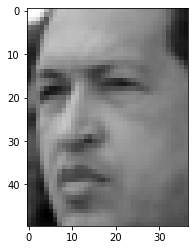

In [ ]:
# datos tipo pandas
Xdata = pd.DataFrame(lfw_people.data)/255
y = lfw_people.target
print('Dimensiones tipo pandas: ',Xdata.shape)
plt.imshow(np.array(Xdata.iloc[0,:]).reshape(lfw_people.images.shape[1],lfw_people.images.shape[2]),cmap='gray')

In [ ]:
#Paso 2: Particion entrenamiento y validacion
# Tamaño Xtrain 70%, Tamaño Xtest 30%
Xtrain, Xtest, ytrain,ytest = train_test_split(Xdata,y,test_size=0.3) #fijar en 0.3 para entrenar -- 0.95 para demostrar funcionalidad del código

Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
926,0.064052,0.053595,0.060131,0.118954,0.247059,0.345098,0.426144,0.443137,0.454902,0.473203,0.478431,0.469281,0.517647,0.525490,0.522876,0.529412,0.530719,0.539869,0.545098,0.550327,0.558170,0.554248,0.543791,0.535948,0.535948,0.530719,0.511111,0.478431,0.452288,0.454902,0.426144,0.394771,0.337255,0.270588,0.138562,0.083660,0.056209,0.062745,0.052288,0.090196,...,0.291503,0.287582,0.279739,0.452288,0.456209,0.454902,0.419608,0.403922,0.392157,0.403922,0.436601,0.453595,0.486275,0.508497,0.509804,0.520261,0.521569,0.513726,0.492810,0.505882,0.546405,0.563399,0.572549,0.579085,0.580392,0.589542,0.571242,0.513726,0.467974,0.400000,0.359477,0.356863,0.292810,0.274510,0.295425,0.294118,0.299346,0.292810,0.286275,0.286275
804,0.125490,0.163399,0.197386,0.281046,0.373856,0.416993,0.407843,0.410457,0.397386,0.364706,0.332026,0.309804,0.287582,0.269281,0.269281,0.284967,0.288889,0.290196,0.298039,0.300654,0.316340,0.359477,0.439216,0.475817,0.464052,0.432680,0.414379,0.415686,0.414379,0.403922,0.407843,0.400000,0.385621,0.368627,0.328105,0.211765,0.126797,0.146405,0.192157,0.252288,...,0.137255,0.137255,0.133333,0.593464,0.836601,0.890196,0.884967,0.860131,0.852288,0.856209,0.779085,0.619608,0.454902,0.347712,0.304575,0.277124,0.269281,0.273203,0.270588,0.281046,0.292810,0.295425,0.286275,0.281046,0.247059,0.215686,0.192157,0.180392,0.216993,0.166013,0.088889,0.083660,0.091503,0.096732,0.108497,0.115033,0.124183,0.134641,0.138562,0.143791
240,0.188235,0.252288,0.227451,0.180392,0.168627,0.269281,0.315033,0.346405,0.526797,0.568627,0.534640,0.543791,0.543791,0.528105,0.518954,0.530719,0.543791,0.547712,0.539869,0.556863,0.577778,0.593464,0.609150,0.627451,0.649673,0.684967,0.733333,0.645752,0.444444,0.538562,0.649673,0.368627,0.223529,0.286275,0.304575,0.458824,0.431373,0.236601,0.219608,0.167320,...,0.913725,0.747712,0.179085,0.200000,0.186928,0.188235,0.194771,0.190850,0.201307,0.198693,0.160784,0.586928,0.725490,0.494118,0.235294,0.209150,0.232680,0.207843,0.192157,0.189542,0.186928,0.183007,0.180392,0.185621,0.201307,0.216993,0.245752,0.267974,0.290196,0.283660,0.269281,0.292810,0.478431,0.802614,0.891503,0.862745,0.930719,0.924183,0.701961,0.156863
520,0.363399,0.355556,0.389542,0.390850,0.398693,0.486275,0.539869,0.566013,0.586928,0.597386,0.610458,0.628758,0.639216,0.648366,0.654902,0.660131,0.660131,0.662745,0.679739,0.698039,0.716340,0.743791,0.762091,0.760784,0.754248,0.750327,0.750327,0.741176,0.717647,0.694118,0.683660,0.673203,0.662745,0.661438,0.618301,0.509804,0.426144,0.389542,0.388235,0.413072,...,0.967320,0.979085,0.967320,0.205229,0.202614,0.184314,0.177778,0.176471,0.162091,0.122876,0.090196,0.069281,0.231373,0.641830,0.567320,0.383007,0.400000,0.433987,0.431373,0.427451,0.435294,0.431373,0.437909,0.454902,0.479739,0.504575,0.515033,0.495425,0.479739,0.509804,0.545098,0.624837,0.743791,0.864052,0.928105,0.946405,0.959477,0.968627,0.976471,0.976471
1005,0.431373,0.418301,0.648366,0.749020,0.742484,0.758170,0.800000,0.837909,0.837909,0.831373,0.826144,0.822222,0.809150,0.798693,0.801307,0.800000,0.800000,0.813072,0.820915,0.822222,0.822222,0.822222,0.824837,0.820915,0.807843,0.801307,0.792157,0.780392,0.771242,0.732026,0.653595,0.577778,0.507190,0.441830,0.410457,0.369935,0.345098,0.495425,0.533333,0.728105,...,0.785621,0.809150,0.818301,0.226144,0.245752,0.244444,0.239216,0.313726,0.746405,0.841830,0.802614,0.716340,0.616993,0.580392,0.538562,0.458824,0.437909,0.428758,0.411765,0.419608,0.426144,0.403922,0.396078,0.388235,0.393464,0.392157,0.388235,0.396078,0.385621,0.396078,0.440523,0.511111,0.560784,0.569935,0.571242,0.588235,0.747712,0.801307,0.798693,0.813072


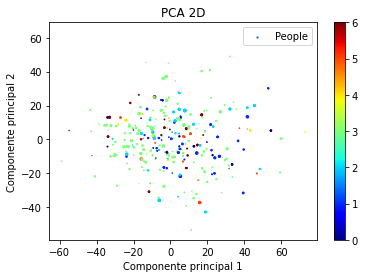

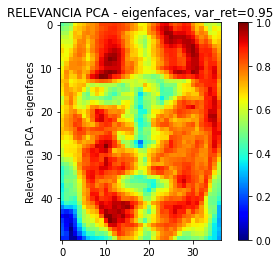

True

In [ ]:
#%% Paso 3 : Analisis exploratorio
#preproceso entrada  y salida para analisis exploratorio
img_path = '' #para guardar from google.colab import files plt.savefig("abc.png") files.download("abc.png") 
pre_exploratorio(Xtrain,ytrain,img_path,'People',lfw_people.images.shape[1],lfw_people.images.shape[2])

In [ ]:
#%% Paso 4 : Escoger modelo por gridsearchCV utilizando pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.externals import joblib #https://joblib.readthedocs.io/en/latest/
import joblib

steps=[[('rep',  PCA()),
        ('cla', GaussianNB())],
       [('rep',  PCA()),
        ('cla', LinearDiscriminantAnalysis())],
       [('rep',  PCA()),
        ('cla', SGDClassifier())],
       [('rep',  MinMaxScaler()),
        ('cla', LinearSVC())],
       [('rep',  StandardScaler()),
        ('cla', RandomForestClassifier())],
       [('rep',  StandardScaler()),
        ('cla', KNeighborsClassifier())],
       [('rep',  StandardScaler()),
        ('cla', LogisticRegression())], 
       [('cla', SVC())],
      ]
parameters = [{
              'rep__n_components' : [0.8,0.9],   #NB           
              #'cla__C': [0.5,1],
              },
              {
              'rep__n_components' : [0.8,0.9],   #LDA          
              #'cla__C': [0.5,1],
              },
              {
              'rep__n_components' : [0.8,0.9],   #SGD          
              'cla__alpha': [0.0001,0.001],
              },
              {
              #'rep__n_components' : [0.8,0.9],   #LSVC          
              'cla__C': [0.5,100,1000],
              },
              {
             #'rep__n_components' : [0.8,0.9],    #RFOREST
             'cla__n_estimators': [200,5000],
             'cla__min_samples_split':[2,4,6,8,10]   
              },
              {
             #'rep__n_components' : [0.8,0.9],    #K-VECINOS        
              'cla__n_neighbors': [11,13,15,17],     
              },
              {
              #'rep__n_components' : [0.8,0.9],   #LOGISTIC          
              'cla__C': [0.5,1],
              },
              {
             #'rep__n_components' : [0.8,0.9],         #SVCK     
             'cla__C': [0.1,1,100,500,1e3],
             'cla__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1e3, 1e4]    
              }
             ]

label_models = ['PCA_NB','PCA_LDA','PCA_SGD','PCA_SVCL','PCA_RForest','PCA_KNeighbors','PCA_Logistic','SVCK']

best_model = []
filename = ''#'resultados/people_comp'
for i in range(len(steps)):
    print('modelo %d/%d' % (i+1,len(steps)))
    grid_search = GridSearchCV(Pipeline(steps[i]), parameters[i], n_jobs=-1,cv=5,
                                scoring='balanced_accuracy',verbose=10)
    grid_search.fit(Xtrain, ytrain)
    #print(grid_search.cv_results_)
    #mejor modelo entrenado
    best_model += [grid_search.best_estimator_]
    joblib.dump(best_model,filename+".pkl")

print('Mejores modelos:\n')
best_model

modelo 1/8
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.7s finished


modelo 2/8
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.6s finished


modelo 3/8
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.4s finished


modelo 4/8
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.3min finished


modelo 5/8
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 28.5min finished


modelo 6/8
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   10.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   10.8s finished


modelo 7/8
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.8s finished


modelo 8/8
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  4

Mejores modelos:



[Pipeline(memory=None,
          steps=[('rep',
                  PCA(copy=True, iterated_power='auto', n_components=0.9,
                      random_state=None, svd_solver='auto', tol=0.0,
                      whiten=False)),
                 ('cla', GaussianNB(priors=None, var_smoothing=1e-09))],
          verbose=False), Pipeline(memory=None,
          steps=[('rep',
                  PCA(copy=True, iterated_power='auto', n_components=0.9,
                      random_state=None, svd_solver='auto', tol=0.0,
                      whiten=False)),
                 ('cla',
                  LinearDiscriminantAnalysis(n_components=None, priors=None,
                                             shrinkage=None, solver='svd',
                                             store_covariance=False,
                                             tol=0.0001))],
          verbose=False), Pipeline(memory=None,
          steps=[('rep',
                  PCA(copy=True, iterated_power='auto', n_compone

#### Matrices de confusión

Evaluando modelo 1/8


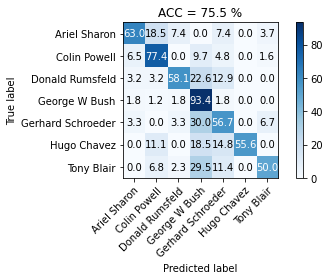

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.63      0.64        27
     Colin Powell       0.77      0.77      0.77        62
  Donald Rumsfeld       0.72      0.58      0.64        31
    George W Bush       0.79      0.93      0.86       166
Gerhard Schroeder       0.45      0.57      0.50        30
      Hugo Chavez       1.00      0.56      0.71        27
       Tony Blair       0.85      0.50      0.63        44

         accuracy                           0.75       387
        macro avg       0.75      0.65      0.68       387
     weighted avg       0.77      0.75      0.75       387

Evaluando modelo 2/8


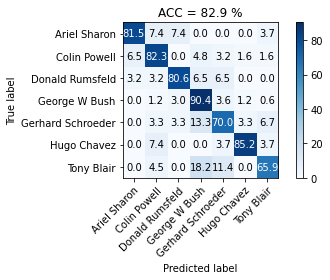

                   precision    recall  f1-score   support

     Ariel Sharon       0.81      0.81      0.81        27
     Colin Powell       0.84      0.82      0.83        62
  Donald Rumsfeld       0.76      0.81      0.78        31
    George W Bush       0.90      0.90      0.90       166
Gerhard Schroeder       0.57      0.70      0.63        30
      Hugo Chavez       0.85      0.85      0.85        27
       Tony Blair       0.83      0.66      0.73        44

         accuracy                           0.83       387
        macro avg       0.79      0.79      0.79       387
     weighted avg       0.83      0.83      0.83       387

Evaluando modelo 3/8


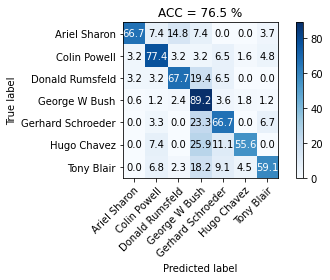

                   precision    recall  f1-score   support

     Ariel Sharon       0.82      0.67      0.73        27
     Colin Powell       0.81      0.77      0.79        62
  Donald Rumsfeld       0.66      0.68      0.67        31
    George W Bush       0.82      0.89      0.86       166
Gerhard Schroeder       0.51      0.67      0.58        30
      Hugo Chavez       0.71      0.56      0.63        27
       Tony Blair       0.76      0.59      0.67        44

         accuracy                           0.76       387
        macro avg       0.73      0.69      0.70       387
     weighted avg       0.77      0.76      0.76       387

Evaluando modelo 4/8


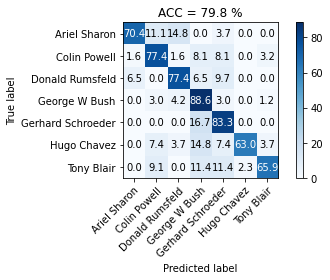

                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.70      0.78        27
     Colin Powell       0.77      0.77      0.77        62
  Donald Rumsfeld       0.65      0.77      0.71        31
    George W Bush       0.88      0.89      0.88       166
Gerhard Schroeder       0.54      0.83      0.66        30
      Hugo Chavez       0.94      0.63      0.76        27
       Tony Blair       0.85      0.66      0.74        44

         accuracy                           0.80       387
        macro avg       0.79      0.75      0.76       387
     weighted avg       0.82      0.80      0.80       387

Evaluando modelo 5/8


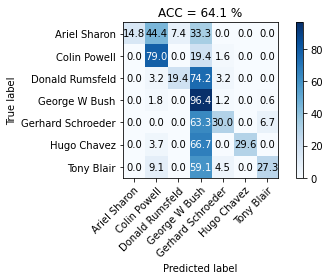

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.15      0.26        27
     Colin Powell       0.70      0.79      0.74        62
  Donald Rumsfeld       0.75      0.19      0.31        31
    George W Bush       0.60      0.96      0.74       166
Gerhard Schroeder       0.60      0.30      0.40        30
      Hugo Chavez       1.00      0.30      0.46        27
       Tony Blair       0.80      0.27      0.41        44

         accuracy                           0.64       387
        macro avg       0.78      0.42      0.47       387
     weighted avg       0.71      0.64      0.59       387

Evaluando modelo 6/8


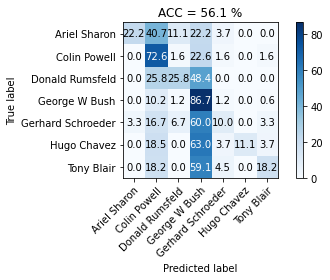

                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.22      0.35        27
     Colin Powell       0.45      0.73      0.56        62
  Donald Rumsfeld       0.50      0.26      0.34        31
    George W Bush       0.60      0.87      0.71       166
Gerhard Schroeder       0.30      0.10      0.15        30
      Hugo Chavez       1.00      0.11      0.20        27
       Tony Blair       0.67      0.18      0.29        44

         accuracy                           0.56       387
        macro avg       0.63      0.35      0.37       387
     weighted avg       0.60      0.56      0.50       387

Evaluando modelo 7/8


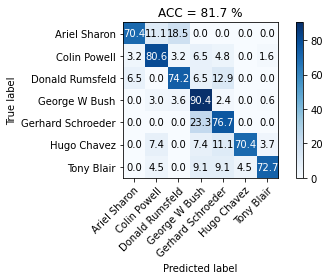

                   precision    recall  f1-score   support

     Ariel Sharon       0.83      0.70      0.76        27
     Colin Powell       0.81      0.81      0.81        62
  Donald Rumsfeld       0.64      0.74      0.69        31
    George W Bush       0.89      0.90      0.90       166
Gerhard Schroeder       0.56      0.77      0.65        30
      Hugo Chavez       0.90      0.70      0.79        27
       Tony Blair       0.91      0.73      0.81        44

         accuracy                           0.82       387
        macro avg       0.79      0.76      0.77       387
     weighted avg       0.83      0.82      0.82       387

Evaluando modelo 8/8


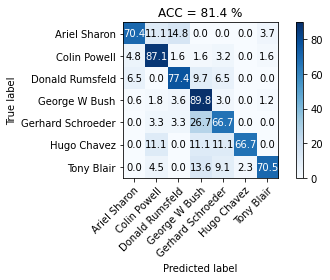

                   precision    recall  f1-score   support

     Ariel Sharon       0.76      0.70      0.73        27
     Colin Powell       0.82      0.87      0.84        62
  Donald Rumsfeld       0.67      0.77      0.72        31
    George W Bush       0.88      0.90      0.89       166
Gerhard Schroeder       0.56      0.67      0.61        30
      Hugo Chavez       0.95      0.67      0.78        27
       Tony Blair       0.89      0.70      0.78        44

         accuracy                           0.81       387
        macro avg       0.79      0.75      0.76       387
     weighted avg       0.82      0.81      0.81       387



In [ ]:
#%% Paso 5: evaluar sobre Xtest
my_model_loaded = joblib.load(filename+".pkl")
path_img = ''
for i in range(len(my_model_loaded)):
    print('Evaluando modelo %d/%d' % (i+1,len(my_model_loaded)))

    ytest_e = my_model_loaded[i].predict(Xtest)
    acc = accuracy_score(ytest,ytest_e)
     
    plot_confusion_matrix(
                          ytest, ytest_e, 
                          classes=lfw_people.target_names,
                          normalize=True,
                          title='ACC = %.1f %%' % (100*acc)
                          )
    plt.autoscale()
    #save_fig(path_img,label_models[i])                      
    plt.show()
    
    cr = classification_report(
                               ytest, ytest_e, 
                               labels=range(lfw_people.target_names.shape[0]),
                               target_names=lfw_people.target_names
                               )                          
    #support = #muestras en la clase estudiada
    print(cr)

##### Análisis matrices de confusión

**NOTA**

Para cada clasificador se realizó un proceso de evaluación y análisis individual, donde pasaron por los métodos de PCA, MinMaxScaler, StandarScaler o ninguno, asimismo, cada clasificador se probó alterando los hiperparámetros.
Finalmente, de todas las combinaciones posibles (para cada clasificador), se escogió aquella que tenía mejor rendimiento y porcentaje de acierto.

**1. Naive Bayes**

Este Clasificador realizó su clasificación utilizando sus componentes (PCA).  Según la matriz de confusión obtenida por el clasificador Naive Bayes, se puede adquirir un porcentaje promedio de acierto del 75.5% el cual comparado con los demás clasificadores, está entre los menores; esto se puede observar con los porcentajes obtenidos de precisión y recall, en donde, se obtiene que el máximo porcentaje de precisión es clasificando las imágenes de Hugo Chavez con un 100%, esto significa que no tiene pocos falsos positivos, es decir, nunca tomó una imagen como imagen de Chavez, cuando en realidad no era, sin embargo, se observa un porcentaje de recall muy bajo (56%) lo que nos da a entender la existencia de varios falsos negativos, es decir, veces en las que dijo que no era Hugo chaves y en realidad si era, con esto concluimos que para este caso el clasificador se comporto de manera muy estricta de clasificación, lo que afecto a que en varias ocaciones se descartaran imágenes del político.

**2. Linear Discriminant Analysis**

Este clasificador realizó su clasificación utilizando sus componentes (PCA).
Según la matriz de confusión obtenida por el clasificador Linear Discriminant Analysis, se puede adquirir un porcentaje promedio de acierto del 82.9% siendo éste uno de los porcentajes más altos de los clasificadores; observando los porcentajes obtenidos de precisión y recall, George Bush tuvo el porcentaje más alto (90%) de precisión, y de recall (90%) lo que significa que tiene pocos falsos positivos, y falsos negativos, sin embargo, esto se puede deber a la cantidad de score que tiene, es decir, que es el político con la mayor cantidad de imágenes de referencia. 

**3. Clasifiador SGD**

Este clasificador realizó su clasificación utilizando sus componentes (PCA).
Según la matriz de confusión obtenida por el clasificador SGD, se puede obtener un porcentaje promedio de acierto del 76.5% siendo éste un porcentaje más bajo del promedio de los clasificadores; Para este caso, el político Ariel Sharon tuvo un porcentaje de precisión de 82% lo que significa, que junto con George Bush son los políticos con menor cantidad de falsos positivos como se puede ver en la matriz, además, Sharon tiene un procentaje bajo de recall, que significa que tiene una mayor cantidad de falsos negativos que otros políticos clasificados, esto nos muestra que su clasificación es tan ardua que hay varias veces en las que descarta una imagen de Sharon diciendo que no es, cuando en realidad si es.

**4. Linear SVC**

Este clasificador realizó su clasificación utilizando MinMaxScaler.
Analizando la matriz de confusión obtenida por el clasificador Linear SVC, se puede obtener un porcentaje promedio de acierto del 79.8% el cual es un valor estándar comparado con los porcentajes de los demás clasificadores; dentro de la matriz vemos que el político Gerhard Schroeder tiene una precisión del 54%, la cual nos indica que fue el político con mayor cantidad de falsos positivos, sin embargo, tiene el segundo recall más alto entre todos los políticos con un 83%, lo que significa que tiene un porcentaje muy bajo de falsos negativos, es decir, pocas veces en las que dijo que no se trataba de Gerhard Shroeder, cuando de verdad había sido él, por lo que el clasificador para este caso, actúa como un clasificador paranoico, el cual dice en su mayoría de veces que sí es el político.

**5. Random Forest**

Para clasificar con Random Forest, se utilizó StandardScaler. Observando su matriz de confusión, vemos que tiene un porcentaje de acierto muy bajo, del 64.1% en donde podemos resaltar que hay un desbalance provocado por la cantidad de muestras, es decir, imágenes de referencia de George Bush, las cuales hacen que tienda a sobre entrenarse y estar sesgado.  

**6. K neighbors classifier**

Para clasificar con K neighbours Classifier se utilizó StandardScaler. Analizando la matriz de confusión, se observa el porcentaje de acierto más bajo de todos los clasificadores, con un 56.1%, en esta, podemos analizar varios casos donde se tiene un recall alto con una presición baja, es decir, un clasificador paranoico, el cual casi en todos sus casos determina como verdadero a cada político, así no se trate del mismo, este es el caso de Colin Powell y George Bush a pesar de que el último se quien tiene la mayor cantidad de muestras. Otros políticos fueron clasificados con un porcentaje de presición alto, pero teniendo un porcentaje de recall bajo, es decir, pocos falsos positivos, pero muchos falsos negativos, como es el caso de Areil Sharon y Hugo Chavez. los políticos restantes tienen un porcentaje bajo tanto en la presición como en el recall, lo que significa la presencia de varios falsos positivos y falsos negativos.

**7. Logistic Regression**

Para clasificar con Logistic Regression, se utilizó StandardScaler. Según la matriz de confusión obtenida por el clasificador Logistic Regression, se puede obtener un porcentaje promedio de acierto del 81.7% el cual es uno de los más altos, comparado con el resto de los clasificadores. Analizando los datos obtenidos de las predicciones de Tony Blair, se puede ver un porcentaje alto de precisión (91%) lo cual significa una cantidad pequeña de falsos positivos, es decir, se trata de un clasificador que va a una predicción "segura", sin embargo, tiene un porcentaje de recall ligeramente bajo (73%) que muestra un porcentaje de falsos negativos que indican que el clasificador trata de confirmar los verdaderos positivos tanto, que termina hasta omitiendo o descartando algunos de ellos.

**8. SVC con Kernel rbf**

Según la matriz de confusión obtenida por el clasificador SVC con kernel rbf, se puede obtener un porcentaje promedio de acierto del 81.4% siendo éste uno de los porcentajes más altos de los clasificadores, el cual se puede rectificar mirando la diagonal de la matriz, para este caso analizando los resultados obtenidos por Colin Powell, se ve que tiene una precisión del 82% lo que muestra que en su predicción hubo pocos falsos positivos (Pocas veces que se predijo que era Colin Powell y en realidad era otro político), y además, tiene un porcentaje de recall alto del 87% lo que indica que en su predicción hubo pocos falsos negativos, es decir, pocos casos en donde se dijo que no era Colin Powell y en realidad si era. El político con el que más se confundió a Colin es con Ariel Sharon.

#### Curva ROC multiclase - sobre conjunto de test

Evaluando ROC modelo 1/8


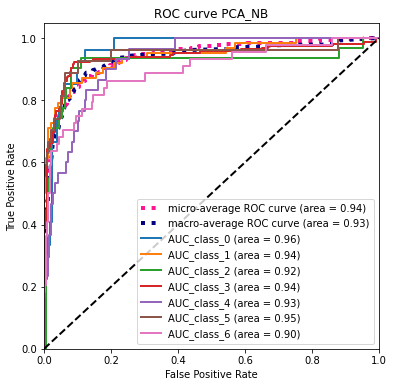

Evaluando ROC modelo 2/8


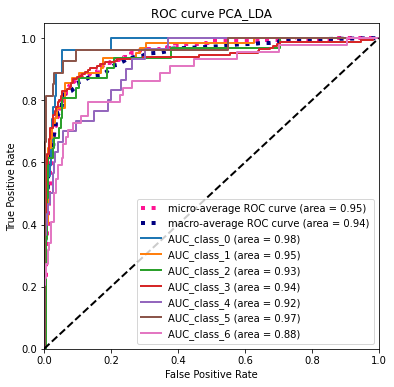

Evaluando ROC modelo 3/8


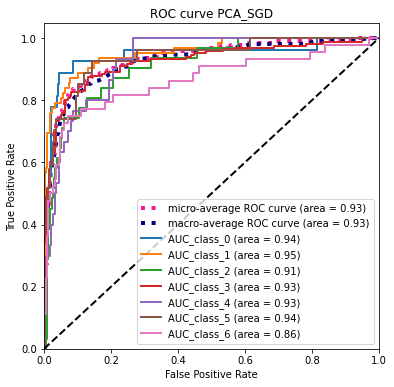

Evaluando ROC modelo 4/8


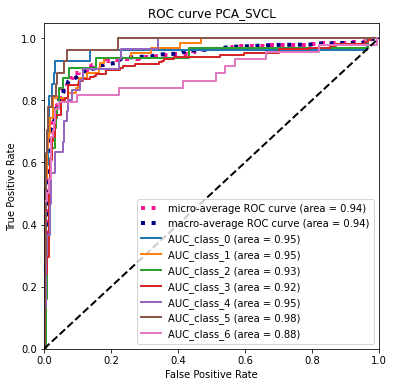

Evaluando ROC modelo 5/8


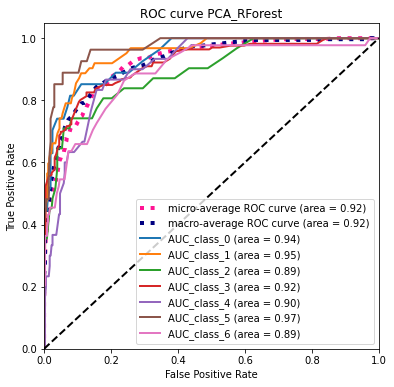

Evaluando ROC modelo 6/8


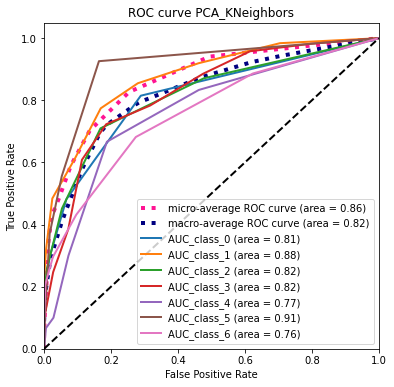

Evaluando ROC modelo 7/8


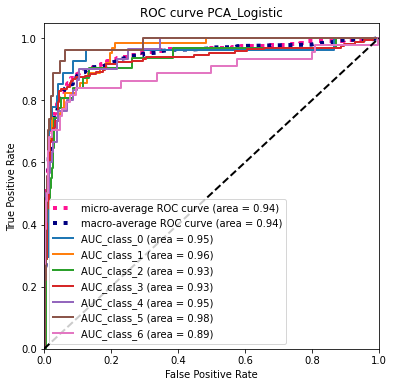

Evaluando ROC modelo 8/8


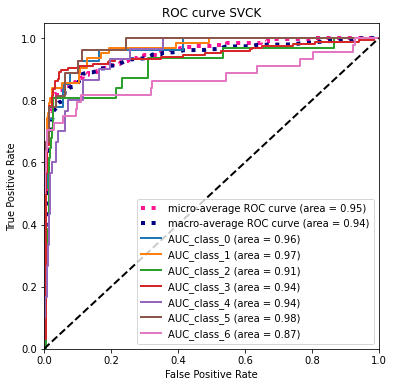

In [ ]:
from sklearn.preprocessing import label_binarize

ytrain_b = label_binarize(ytrain, classes=range(lfw_people.target_names.shape[0]))
ytest_b = label_binarize(ytest, classes=range(lfw_people.target_names.shape[0]))

for i in range(len(my_model_loaded)):
    print('Evaluando ROC modelo %d/%d' % (i+1,len(my_model_loaded)))
    if i == 0 or i == 4 or i == 5:
      ytest_score = my_model_loaded[i].predict_proba(Xtest) #debe calcularse la funcion de decision o el posterior de la probabilidad
    elif (i >= 1 and i <=3) or i >5:
      ytest_score = my_model_loaded[i].decision_function(Xtest)
  
    roc_auc, fpr, tpr, n_classes = roc_multiclass(ytest_b,ytest_score)
    roc_auc_mc(roc_auc,fpr,tpr,n_classes,'ROC curve ' + label_models[i],path_img)

##### Conclusión general curvas ROC

En general podemos apreciar que el área bajo la curva (micro y macro) de los distintos modelos se encuentra en un rango de 0.92 y 0.95, exceptuando el modelo de k-Neighbors el cual se encuentra entre 0.82 y 0.86, siendo este el modelo menos eficiente; también podemos apreciar que en general todos los modelos nos presentan unas buenas clasificaciones, sin embargo aquellos que nos dan mejores resultados y sobresalen entre los demás son SVC con Kernel rbf, Logistic Regression y Linear Discriminant Analysis.